In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# Load the Excel file
xls = pd.ExcelFile('falls1.xls')

# Print available sheet names
print("Available sheets:", xls.sheet_names)

# Step 1: Parse all sheets and concatenate into one DataFrame
dfs = []
for sheet_name in xls.sheet_names:
    df_sheet = xls.parse(sheet_name)
    df_sheet.columns = [str(col).strip().replace('\xa0', '').lower() for col in df_sheet.columns]
    
    # Add sheet name as a source tag (optional)
    df_sheet['source_sheet'] = sheet_name
    
    dfs.append(df_sheet)

# Step 2: Combine all into a single DataFrame
df_full = pd.concat(dfs, ignore_index=True)

# Step 3: Handle time column (normalize to seconds)
time_col = next((col for col in df_full.columns if 'time' in col), None)
df_full[time_col] = pd.to_numeric(df_full[time_col], errors='coerce')
df_full['time(s)'] = df_full[time_col] / 1000.0  # Assuming milliseconds

# Step 4: Show summary
print("Combined shape:", df_full.shape)
print("Columns:", df_full.columns.tolist())

Available sheets: ['graphs', 'Hoja1', 'Hoja2', 'Hoja3', 'Hoja4', 'Hoja5', 'Hoja6', 'Hoja7', 'Hoja8', 'Hoja9', 'Hoja10', 'Hoja11', 'Hoja12', 'Hoja13', 'Hoja14', 'Hoja15']
Combined shape: (1491, 11)
Columns: ['source_sheet', 'pitch', 'roll', 'yaw', 'gyroy', 'gyrox', 'gyroz', 'time(ms)', 'count', 'time (ms)', 'time(s)']


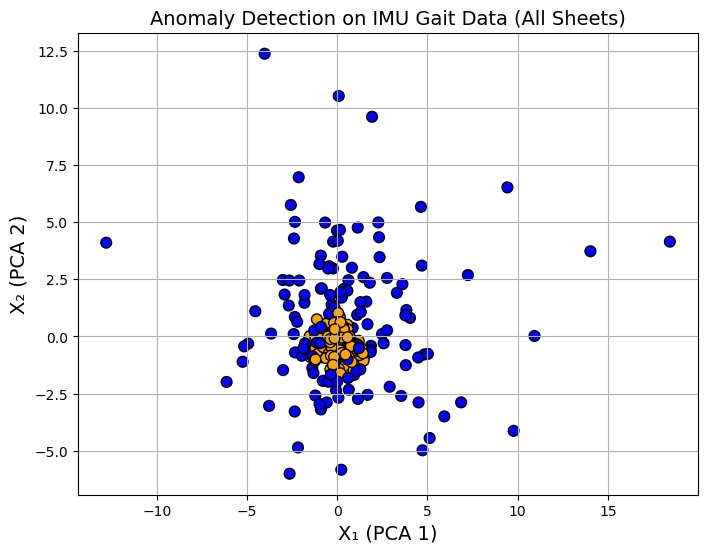

In [6]:
required_columns = ['gyrox', 'gyroy', 'gyroz']
df_full = df_full.dropna(subset=required_columns)  # Remove rows with NaNs
X = df_full[required_columns]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# Train One-Class SVM
clf = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
clf.fit(X_scaled)
y_pred = clf.predict(X_scaled)  # 1 = normal, -1 = anomaly

# Plot
plt.figure(figsize=(8, 6))
colors = np.where(y_pred == 1, 'orange', 'blue')
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=colors, s=60, edgecolors='k')
plt.xlabel("X₁ (PCA 1)", fontsize=14)
plt.ylabel("X₂ (PCA 2)", fontsize=14)
plt.title("Anomaly Detection on IMU Gait Data (All Sheets)", fontsize=14)
plt.grid(True)
plt.show()

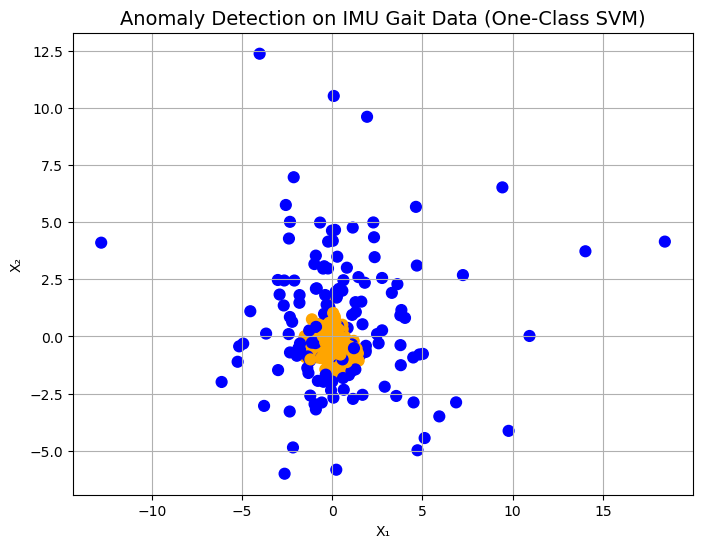

In [13]:
# Step 4: Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# Step 6: Train One-Class SVM
clf = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)  # Adjust nu for sensitivity
clf.fit(X_scaled)

# Step 7: Predict Anomalies
y_pred = clf.predict(X_scaled)  # 1 = normal, -1 = anomaly

# Step 8: Plot the Result
plt.figure(figsize=(8, 6))
colors = np.where(y_pred == 1, 'orange', 'blue')  # Orange = normal, Blue = anomaly
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=colors, s=60)

plt.xlabel("X₁", fontsize=10)
plt.ylabel("X₂", fontsize=10)
plt.title("Anomaly Detection on IMU Gait Data (One-Class SVM)", fontsize=14)
plt.grid(True)
plt.show()

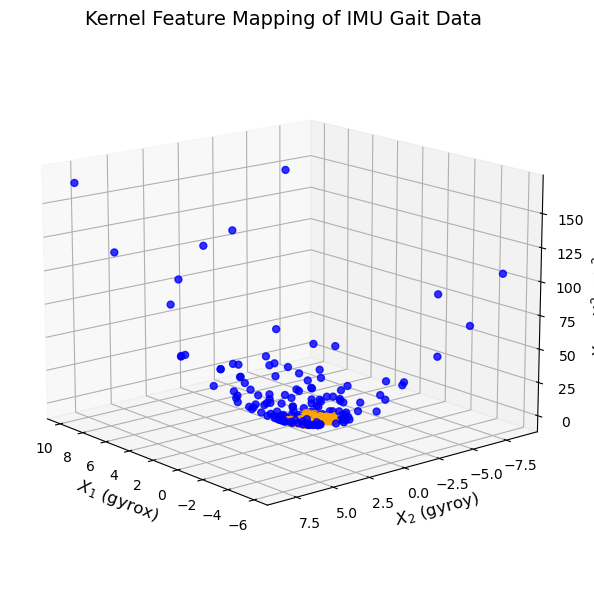

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

required_columns = ['gyrox', 'gyroy']
df_full = df_full.dropna(subset=required_columns)
X_raw = df_full[required_columns].copy()

# Step 3: Scale gyrox and gyroy
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Extract features
gx = X_scaled[:, 0]
gy = X_scaled[:, 1]
gz = gx**2 + gy**2  # Kernel lift: x₁² + x₂²

# Step 4: Train One-Class SVM on 2D and apply to 3D
clf = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
clf.fit(X_scaled)
y_pred = clf.predict(X_scaled)  # -1 = anomaly (fall), 1 = normal

# Step 5: Plot 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=140)

# Color: blue = anomaly (fall), orange = normal
colors = np.where(y_pred == 1, 'orange', 'blue')

ax.scatter(gx, gy, gz, c=colors, s=25, alpha=0.8)

ax.set_xlabel("$X_1$ (gyrox)", fontsize=12)
ax.set_ylabel("$X_2$ (gyroy)", fontsize=12)
ax.set_zlabel("$X_3 = X_1^2 + X_2^2$", fontsize=12)
ax.set_title("Kernel Feature Mapping of IMU Gait Data", fontsize=14)

plt.tight_layout()
plt.show()

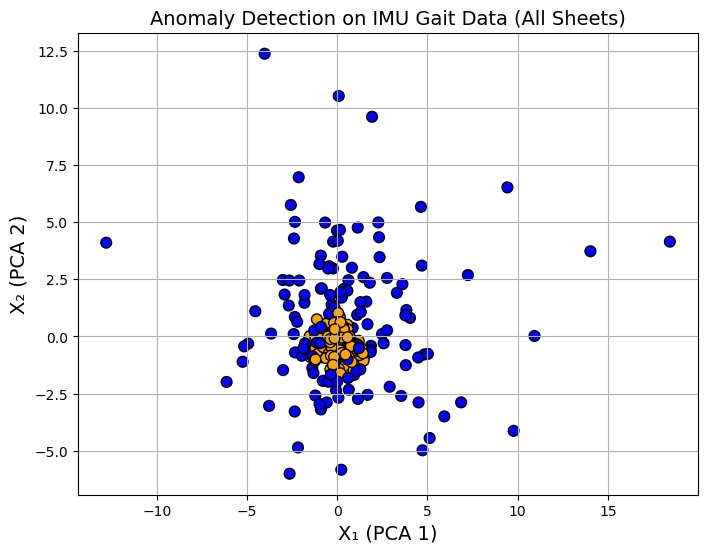

In [6]:
required_columns = ['gyrox', 'gyroy', 'gyroz']
df_full = df_full.dropna(subset=required_columns)  # Remove rows with NaNs
X = df_full[required_columns]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# Train One-Class SVM
clf = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
clf.fit(X_scaled)
y_pred = clf.predict(X_scaled)  # 1 = normal, -1 = anomaly

# Plot
plt.figure(figsize=(8, 6))
colors = np.where(y_pred == 1, 'orange', 'blue')
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=colors, s=60, edgecolors='k')
plt.xlabel("X₁ (PCA 1)", fontsize=14)
plt.ylabel("X₂ (PCA 2)", fontsize=14)
plt.title("Anomaly Detection on IMU Gait Data (All Sheets)", fontsize=14)
plt.grid(True)
plt.show()